# Machine Learning Project
by Alexandre Waerniers and Vincent Lamy
students Albert School x Mines Paris PSL

# Citation Request
  This dataset is public available for research. The details are described in [Moro et al., 2011]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

  Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt

In [330]:
import pandas as pd
import numpy as np
import os

# Get project path
cwd = os.getcwd()
project_path = os.path.dirname(cwd)
print(f"Project path: {project_path}")
print()
print(f"Link to web page : https://archive.ics.uci.edu/dataset/222/bank+marketing")

Project path: c:\Users\Vincent\GitHub\Vincent-20-100\supervised_ml_project_waerniers_lamy

Link to web page : https://archive.ics.uci.edu/dataset/222/bank+marketing


In [331]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
metadata = bank_marketing.metadata
  
# variable information 
variable_info = bank_marketing.variables

In [332]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN


In [333]:
# Display dataset information especially to check for dtypes and missing values
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [334]:
# Check the number of distinct values in "boolean like" columns
print(X["default"].value_counts())
print()
print(X["housing"].value_counts())
print()
print(X["loan"].value_counts())
print()
print(y["y"].value_counts())

default
no     44396
yes      815
Name: count, dtype: int64

housing
yes    25130
no     20081
Name: count, dtype: int64

loan
no     37967
yes     7244
Name: count, dtype: int64

y
no     39922
yes     5289
Name: count, dtype: int64


In [335]:
# Boolean-like columns have "yes" and "no" values only
# So we can make three types of columns, categorical, numerical and boolean
# This is useful for applying different scaling processes to each type
boolean_cols = ["default", "housing", "loan"]
categorical_cols = X.drop(columns=boolean_cols).select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Boolean columns: {boolean_cols}")
print(f"Categorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

Boolean columns: ['default', 'housing', 'loan']
Categorical columns: ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
Numerical columns: ['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']


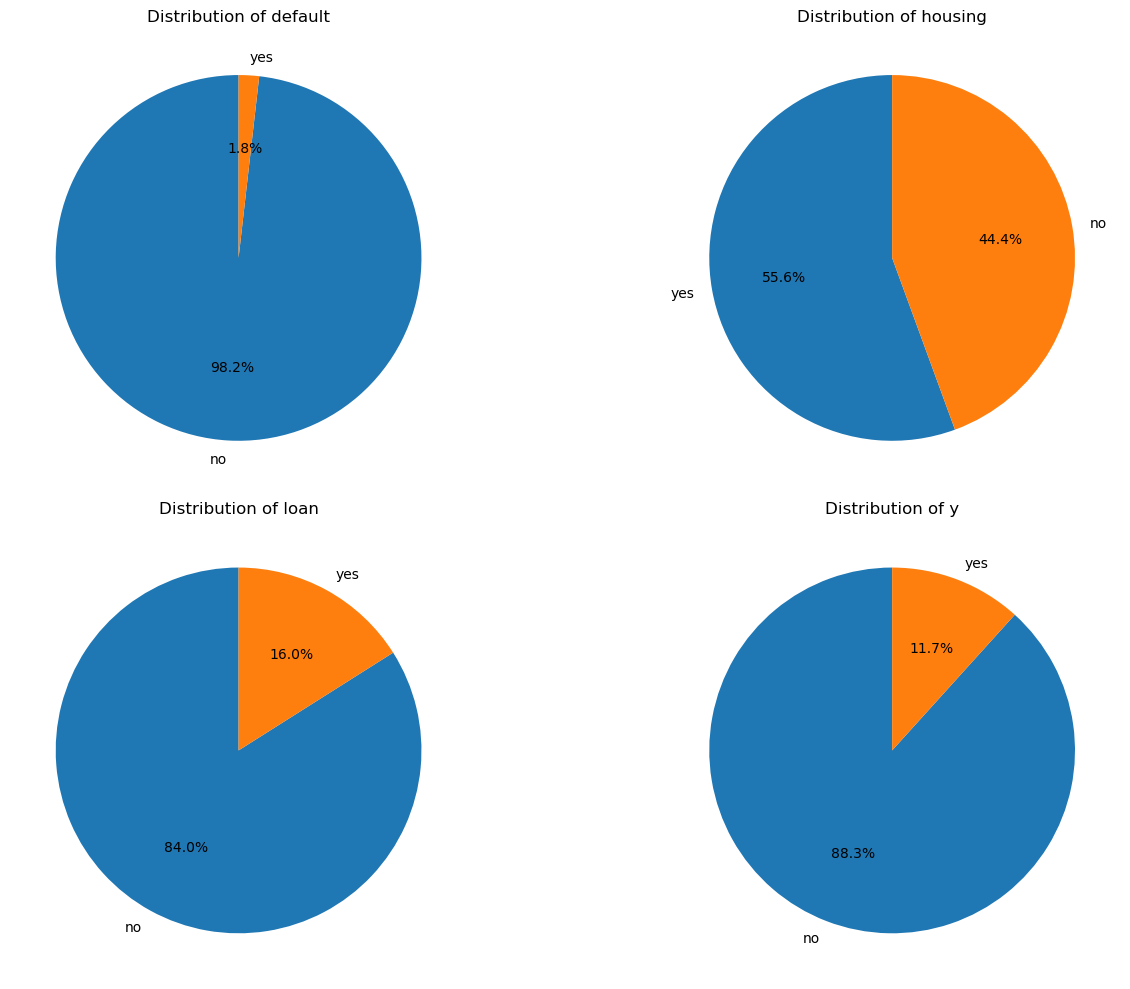

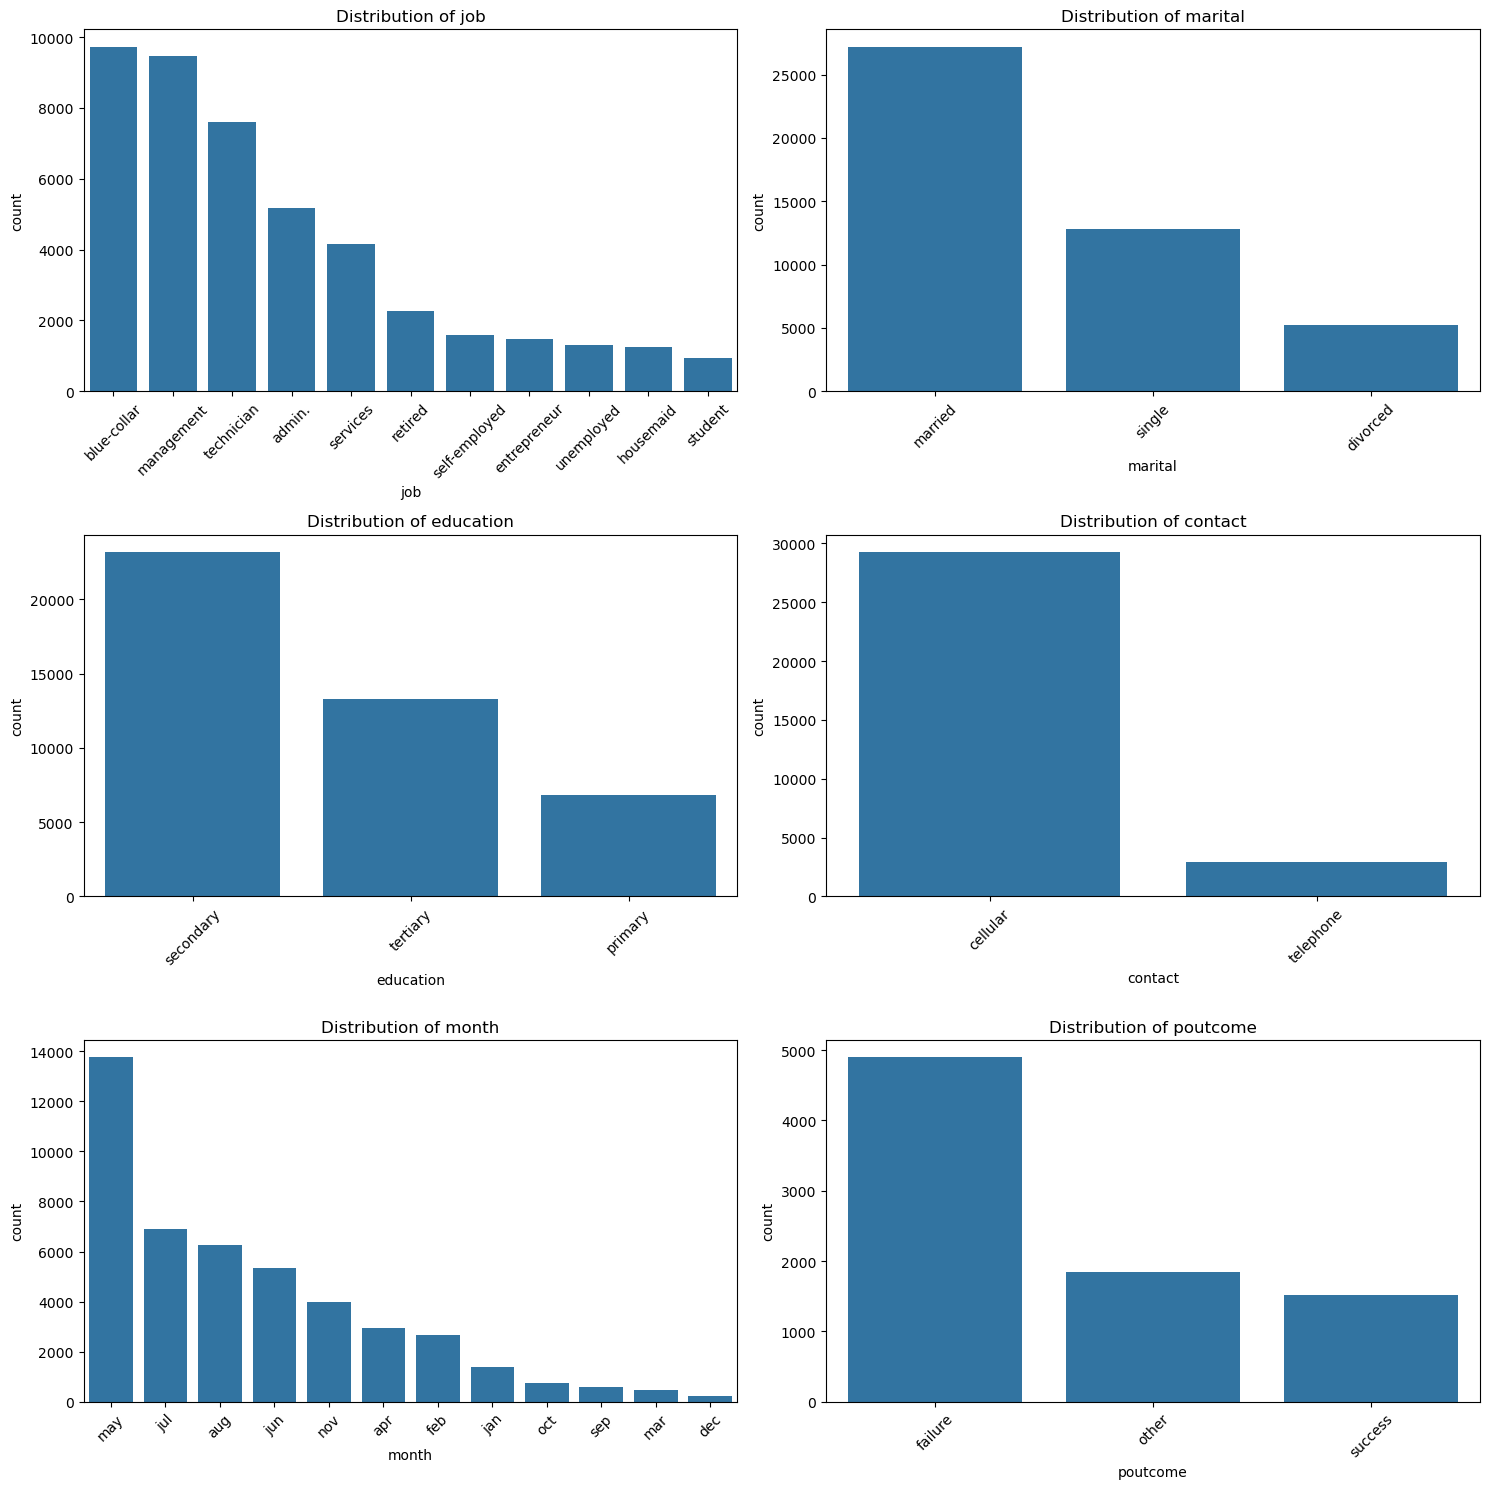

In [336]:
import matplotlib.pyplot as plt
import seaborn as sns

display_df = X.copy()
display_df['y'] = y['y'].copy()

# Créer une figure pour les diagrammes en camembert des variables binaires
plt.figure(figsize=(15, 10))
for i, col in enumerate((boolean_cols + ['y']), 1):
    plt.subplot(2, 2, i)
    value_counts = display_df[col].value_counts()
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Créer une figure pour les graphiques en barres des variables catégorielles
plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=display_df, x=col, order=display_df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [337]:
# We can convert boolean columns to binary
# to avoid the OneHotEncoder creating unnecessary columns
for col in boolean_cols:
    if X[col].dtype == 'object':
        X.loc[:, col] = X[col].map({'no': 0, 'yes': 1})
X[boolean_cols].sample(5)

,default,housing,loan
35697,0,1,1
3570,0,1,0
10653,0,0,0
26611,0,1,0
5799,0,1,0


In [338]:
if y['y'].dtype  == 'object':
    y.loc[:,'y'] = pd.DataFrame(y.loc[:,'y'].map({'no': 0, 'yes': 1}))
y.sample(5)

,y
26534,0
12037,0
42509,0
36751,0
27580,0


In [339]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Let's define the preprocessor with appropriate transformers for each column type
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# We can now create a first pipeline for a dummy model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])
pipeline

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = X
y = y['y']

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Entraîner le modèle
pipeline.fit(X_train, y_train)

# Prédire et évaluer le modèle
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7980
           1       0.63      0.38      0.48      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.68      0.71      9043
weighted avg       0.89      0.90      0.89      9043

